In [58]:
import pandas as pd

## importing data

In [59]:
df_train = pd.read_csv("./data/emobilis/aug_train.csv")

In [60]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## check missing values

In [61]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## select column based on data types

In [62]:
#select object columns
df_train.select_dtypes(include = "object")

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,city_65,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


In [63]:
#select numeric columns
df_train.select_dtypes(include = ['int','float'])

,enrollee_id,city_development_index,training_hours,target
0,8949,0.920,36,1.0
1,29725,0.776,47,0.0
2,11561,0.624,83,0.0
3,33241,0.789,52,1.0
4,666,0.767,8,0.0
...,...,...,...,...
19153,7386,0.878,42,1.0
19154,31398,0.920,52,1.0
19155,24576,0.920,44,0.0
19156,5756,0.802,97,0.0


## exploratory data analysis

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [65]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [66]:
df_train.describe(include="object")

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [67]:
df_train.loc[:,'city_development_index'].mean()

0.8288480008351603

In [68]:
df_train.iloc[:, 2].median()

0.903

In [69]:
df_train.iloc[:,2].mode()[0]

0.92

In [70]:
df_train.iloc[:,2].var()

0.015218123055720208

In [71]:
df_train.iloc[:,2].std()

0.12336175686054494

In [72]:
df_train.iloc[:,2].max()

0.949

In [73]:
df_train.iloc[:,2].min()

0.4479999999999999

## quartiles and percentiles

Certainly! In pandas, a popular Python library for data manipulation and analysis, you can calculate quartiles and percentiles easily using the `quantile()` function. Here's a brief explanation:

1. **Quartiles**: Quartiles divide a dataset into four equal parts. The first quartile (Q1) is the value below which 25% of the data fall, the second quartile (Q2) is the median, and the third quartile (Q3) is the value below which 75% of the data fall.

2. **Percentiles**: Percentiles divide a dataset into 100 equal parts. The nth percentile is the value below which n% of the data fall.

Here's how you can calculate quartiles and percentiles using pandas:

```python
import pandas as pd

# Sample data
data = pd.Series([12, 23, 34, 45, 56, 67, 78, 89, 90, 100])

# Quartiles
q1 = data.quantile(0.25)
q2 = data.quantile(0.5)  # Same as median
q3 = data.quantile(0.75)

print("Q1 (25th percentile):", q1)
print("Q2 (50th percentile, Median):", q2)
print("Q3 (75th percentile):", q3)

# Percentiles
p75 = data.quantile(0.75)
p90 = data.quantile(0.90)
p95 = data.quantile(0.95)

print("75th percentile:", p75)
print("90th percentile:", p90)
print("95th percentile:", p95)
```

In this code:
- `quantile()` function is used to calculate quartiles and percentiles. You pass the desired percentile (0.25 for Q1, 0.5 for Q2, etc.) as an argument.
- For quartiles, you specify `0.25`, `0.5`, and `0.75` for Q1, Q2 (median), and Q3, respectively.
- For percentiles, you can pass any value between 0 and 1. For example, `0.75` for the 75th percentile, `0.90` for the 90th percentile, and so on.

In [74]:
df_train.loc[:,'training_hours'].quantile(0.25)

23.0

In [75]:
df_train.loc[:,'training_hours'].quantile(0.5)

47.0

In [76]:
df_train.loc[:,'training_hours'].quantile(0.75)

88.0

In [77]:
df_train.loc[:,'training_hours'].quantile(0.999)

334.0

In [78]:
def quantiles_cal(df):
    for col in df.select_dtypes(include = ['int', 'float']):
        print(col)
        print("Lower quartile")
        print(df[col].quantile(0.25))
        print("Median")
        print(df[col].quantile(0.5))
        print("Upper quartile")
        print(df[col].quantile(0.75))
        print()

In [79]:
quantiles_cal(df_train)

enrollee_id
Lower quartile
8554.25
Median
16982.5
Upper quartile
25169.75

city_development_index
Lower quartile
0.74
Median
0.903
Upper quartile
0.92

training_hours
Lower quartile
23.0
Median
47.0
Upper quartile
88.0

target
Lower quartile
0.0
Median
0.0
Upper quartile
0.0



## handling missing values

In [80]:
ds = df_train.isnull().sum()
ds.index.to_list()

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

### dealing with missing values greater than 10% of the data

In [81]:
def missing_percentage(df):
    missing_vals = df.isnull().sum()
    total = len(df)
    missing_perc = (missing_vals / total) * 100
    return(pd.DataFrame({'Column': missing_perc.index, 'Missing_percentage': missing_perc.values}))

In [82]:
missing_percentage_train = missing_percentage(df_train)

In [83]:
missing_percentage_train

,Column,Missing_percentage
0,enrollee_id,0.000000
1,city,0.000000
2,city_development_index,0.000000
3,gender,23.530640
4,relevent_experience,0.000000
5,enrolled_university,2.014824
6,education_level,2.401086
7,major_discipline,14.683161
8,experience,0.339284
9,company_size,30.994885


In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
df_train["gender"].fillna('unspecified', inplace= True)

In [86]:
df_train['major_discipline'].fillna('unspecified', inplace = True)

In [87]:
df_train['company_size'].fillna('unspecified', inplace = True)

In [88]:
df_train['company_type'].fillna('unspecified' , inplace = True)

In [89]:
missing_percentage(df_train)

,Column,Missing_percentage
0,enrollee_id,0.000000
1,city,0.000000
2,city_development_index,0.000000
3,gender,0.000000
4,relevent_experience,0.000000
5,enrolled_university,2.014824
6,education_level,2.401086
7,major_discipline,0.000000
8,experience,0.339284
9,company_size,0.000000


In [90]:
df_train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [91]:
df_train.select_dtypes(include = ['int', 'float']).fillna(df_train.select_dtypes(include = ['int', 'float']).median(), inplace=True)

In [92]:
missing_percentage(df_train)

,Column,Missing_percentage
0,enrollee_id,0.000000
1,city,0.000000
2,city_development_index,0.000000
3,gender,0.000000
4,relevent_experience,0.000000
5,enrolled_university,2.014824
6,education_level,2.401086
7,major_discipline,0.000000
8,experience,0.339284
9,company_size,0.000000


In [93]:
enrolled_university_mode = df_train['enrolled_university'].mode()[0]

In [94]:
df_train['enrolled_university'] = df_train['enrolled_university'].fillna(enrolled_university_mode)

In [95]:
df_train['enrolled_university'].value_counts()

enrolled_university
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [96]:
education_level_mode=df_train['education_level'].mode()

In [97]:
education_level_mode = education_level_mode[0]

In [98]:
df_train['education_level']=df_train['education_level'].fillna(education_level_mode)

In [99]:
df_train['education_level'].value_counts()

education_level
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [100]:
experience_mode=df_train['experience'].mode()

In [101]:
experience_mode=experience_mode[0]

In [102]:
df_train['experience']=df_train['experience'].fillna(experience_mode)

In [103]:
df_train['experience'].value_counts()

experience
>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [104]:
missing_percentage(df_train)

,Column,Missing_percentage
0,enrollee_id,0.000000
1,city,0.000000
2,city_development_index,0.000000
3,gender,0.000000
4,relevent_experience,0.000000
5,enrolled_university,0.000000
6,education_level,0.000000
7,major_discipline,0.000000
8,experience,0.000000
9,company_size,0.000000


In [105]:
last_new_job_mode=df_train['last_new_job'].mode()

In [106]:
last_new_job_mode=last_new_job_mode[0]

In [107]:
df_train['last_new_job']=df_train['last_new_job'].fillna('last_new_job_mode')

In [108]:
df_train['last_new_job'].value_counts()

last_new_job
1                    8040
>4                   3290
2                    2900
never                2452
4                    1029
3                    1024
last_new_job_mode     423
Name: count, dtype: int64

In [109]:
missing_percentage(df_train)

,Column,Missing_percentage
0,enrollee_id,0.0
1,city,0.0
2,city_development_index,0.0
3,gender,0.0
4,relevent_experience,0.0
5,enrolled_university,0.0
6,education_level,0.0
7,major_discipline,0.0
8,experience,0.0
9,company_size,0.0


In [110]:
df_train['training_hours'].describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [111]:
df_train['training_hours'].mode()

0    28
Name: training_hours, dtype: int64

In [112]:
df_train['training_hours'].mean()

65.36689633573442

<Axes: >

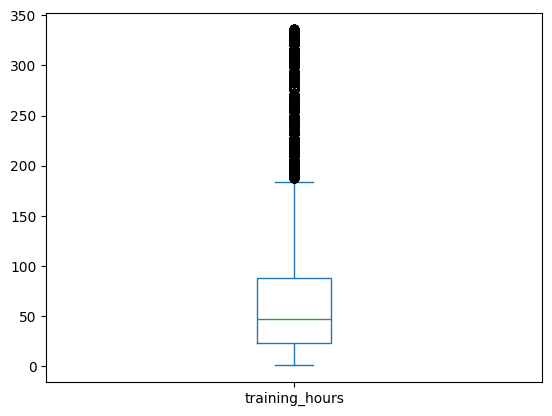

In [113]:
df_train['training_hours'].plot(kind='box')

<Axes: ylabel='count'>

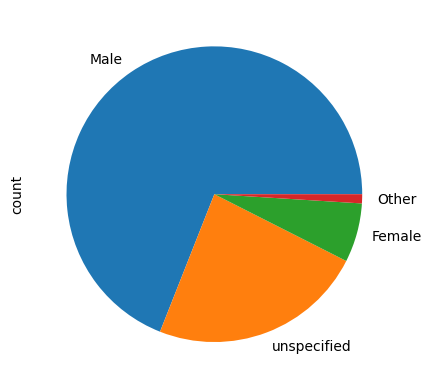

In [114]:
df_train['gender'].value_counts().plot(kind = 'pie')

In [115]:
df = pd.read_excel('./data/CrystalPools.xlsx')

In [116]:
df.head()

,Month,Transaction Number,Product Code,Product Description,Store Cost,Sale Price,Profit,Commision 10%,Sales Person,Sale Location
0,Jan,1001,9822,Pool Cover,58.3,98.4,NaN,NaN,Chalie Barns,NM
1,Jan,1002,2877,Net,11.4,16.3,NaN,NaN,Juan Hernandez,CA
2,Jan,1003,2499,8 ft Hose,6.2,9.2,NaN,NaN,Doug Smith,AZ
3,Jan,1004,8722,Water Pump,344.0,502.0,NaN,NaN,Chalie Barns,AZ
4,Jan,1005,1109,Chlorine Test Kit,3.0,8.0,NaN,NaN,Doug Smith,AZ


In [117]:
df.describe()

,Transaction Number,Product Code,Store Cost,Sale Price,Profit,Commision 10%
count,171.000000,171.000000,171.000000,171.000000,0.0,0.0
mean,1086.000000,5127.555556,62.888304,100.061988,NaN,NaN
std,49.507575,3127.658335,104.912064,152.566928,NaN,NaN
min,1001.000000,1109.000000,3.000000,7.000000,NaN,NaN
25%,1043.500000,2499.000000,6.200000,9.200000,NaN,NaN
50%,1086.000000,4421.000000,11.400000,16.300000,NaN,NaN
75%,1128.500000,8722.000000,58.300000,98.400000,NaN,NaN
max,1171.000000,9822.000000,344.000000,502.000000,NaN,NaN


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                171 non-null    object 
 1   Transaction Number   171 non-null    int64  
 2   Product Code         171 non-null    int64  
 3   Product Description  171 non-null    object 
 4   Store Cost           171 non-null    float64
 5   Sale Price           171 non-null    float64
 6   Profit               0 non-null      float64
 7   Commision 10%        0 non-null      float64
 8   Sales Person         171 non-null    object 
 9   Sale Location        171 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 13.5+ KB


In [125]:
df['Product Code'].mean()

5127.555555555556

In [127]:
df.dtypes

Month                   object
Transaction Number       int64
Product Code             int64
Product Description     object
Store Cost             float64
Sale Price             float64
Profit                 float64
Commision 10%          float64
Sales Person            object
Sale Location           object
dtype: object